# Description:
In this notebook the simulated galactic noise computed via NuRadioReco is compared to the data. For this the results of the cluster jobs are used.

# Import modules:

In [4]:
from GalaxyFunctions import *

# Import data

Note:
- createLPDA_100MHz_InfFirn_n1.4_InfFirn.pkl spellingsfout
- WARNING:NuRadioReco.antennapattern:no hash sum of createLPDA_100MHz_InfFirn_n1.4_InfFirn.pkl available, skipping up-to-date check

In [68]:
def TransitCurveComparison(StNr,ChNr,DataFileId,SimFileId,NBins):
        import numpy as np
        import matplotlib.pyplot as plt
        SimEventRMS=np.load("JobResults/Sim/St" + str(StNr) + "Ch" + str(ChNr) + "/SimEventRMS_" + str(SimFileId) + "-Tot.npy",allow_pickle=True)
        SimEventTime=np.load("JobResults/Sim/St" + str(StNr) + "Ch" + str(ChNr) + "/SimEventTime_" + str(SimFileId) + "-Tot.npy",allow_pickle=True)
        DataEventRMS=np.load("JobResults/Data/St" + str(StNr) + "Ch" + str(ChNr) + "/EventRMS_" + str(DataFileId) + "-Tot.npy",allow_pickle=True)
        DataEventTime=np.load("JobResults/Data/St" + str(StNr) + "Ch" + str(ChNr) + "/EventTime_" + str(DataFileId) + "-Tot.npy",allow_pickle=True)
        
        SimEventTimeCounts, SimEventTimeBins=np.histogram(SimEventTime, bins=NBins,range=(0,24),density=False) #Storing timestamps in histogram format
        DataEventTimeCounts, DataEventTimeBins=np.histogram(DataEventTime, bins=NBins,range=(0,24),density=False) #Storing timestamps in histogram format
        #Compute std per bin
        
        SimEventTimeDig=np.digitize(SimEventTime,SimEventTimeBins)
        SimGroupedVRMS=np.empty((NBins,),dtype=object)
        for i in range(len(SimEventTimeDig)):
            SimGroupedVRMS[SimEventTimeDig[i]-1]=np.append(SimGroupedVRMS[SimEventTimeDig[i]-1],SimEventRMS[i])
        ##Get rid of "None" entries in beginning of array
        for i in range(len(SimGroupedVRMS)):
            SimGroupedVRMS[i]=np.delete(SimGroupedVRMS[i], 0) 
        
        DataEventTimeDig=np.digitize(DataEventTime,DataEventTimeBins)
        DataGroupedVRMS=np.empty((NBins,),dtype=object)
        for i in range(len(DataEventTimeDig)):
            DataGroupedVRMS[DataEventTimeDig[i]-1]=np.append(DataGroupedVRMS[DataEventTimeDig[i]-1],DataEventRMS[i])
        ##Get rid of "None" entries in beginning of array
        for i in range(len(DataGroupedVRMS)):
            DataGroupedVRMS[i]=np.delete(DataGroupedVRMS[i], 0) 
        
        SimMidBins= np.array([(SimEventTimeBins[i] + SimEventTimeBins[i+1])/2 for i in range(0,len(SimEventTimeBins)-1)]) 
        SimVRMSAvg=np.array([np.mean(SimGroupedVRMS[i]) if len(SimGroupedVRMS[i])!=0 else 0 for i in range(len(SimGroupedVRMS))])
        SimVRMSStd=np.array([np.std(SimGroupedVRMS[i])/len(SimGroupedVRMS[i]) if len(SimGroupedVRMS[i])!=0 else 0 for i in range(len(SimGroupedVRMS))])

        SimVRMSAvg+=1.5477116006013911 #Adding thermal noise
        
        DataMidBins= np.array([(DataEventTimeBins[i] + DataEventTimeBins[i+1])/2 for i in range(0,len(DataEventTimeBins)-1)]) 
        DataVRMSAvg=np.array([np.mean(DataGroupedVRMS[i]) if len(DataGroupedVRMS[i])!=0 else 0 for i in range(len(DataGroupedVRMS))])
        DataVRMSStd=np.array([np.std(DataGroupedVRMS[i])/len(DataGroupedVRMS[i]) if len(DataGroupedVRMS[i])!=0 else 0 for i in range(len(DataGroupedVRMS))])
        
        
        
        
        
        fig, ax1 = plt.subplots(figsize=(15,5))
        plt.grid(color='grey', linestyle='-', linewidth=1,alpha=0.5)
        #fig.suptitle("Entries:" + str(len(SimEventRMS)), x=0.3, y=0.8, fontsize=18,bbox=dict(edgecolor='black', facecolor='none', alpha=0.2, pad=10.0))
        fig.suptitle("Comparison of Transit curve for station " + str(StNr) + ", channel " + str(ChNr) + " with simulation",x=0.5,y=0.94,fontsize=22)
        fig.text(0.20, 0.8, "Entries:" + str(len(SimEventRMS)), fontsize=18,bbox=dict(edgecolor='black', facecolor='none', alpha=0.2, pad=10.0))
        #color = 'tab:red'
        ax1.set_xlabel("LST Time (hrs)",fontsize=20)
        ax1.set_ylabel("V_RMS (mV)",fontsize=20)
        ax1.errorbar(DataMidBins,1000*DataVRMSAvg,yerr=1000*DataVRMSStd,fmt=".",zorder=2,label="Data",markersize=15)
        ax1.errorbar(SimMidBins,SimVRMSAvg,yerr=SimVRMSStd,fmt=".",zorder=2,label="Simulation",markersize=15)
        ax1.tick_params(axis='y', which='major', labelsize=25)
        ax1.tick_params(axis='x', which='major', labelsize=25)
        ax1.set_yticks(np.arange(np.round(np.min(1000*DataVRMSAvg),1),np.round(np.max(SimVRMSAvg),1),0.2))
        ax1.set_xticks(np.arange(0, 24, 1.0))
        plt.legend()
        
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        ax2.set_ylabel('Fraction simulation/data',fontsize=20)  # we already handled the x-label with ax1
        ax2.plot(SimVRMSAvg/(1000*DataVRMSAvg), color='red', alpha=0.5,label="Fraction")
        ax2.tick_params(axis='y', which='major', labelsize=25)
        plt.legend()
        #fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.show()
        
        return

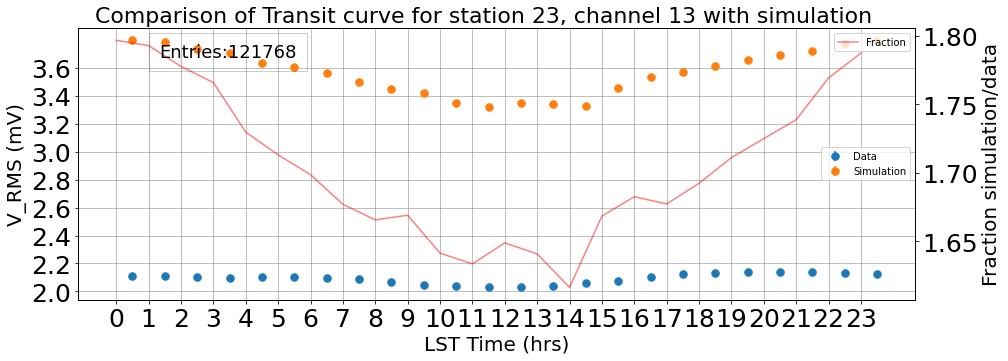

In [69]:
TransitCurveComparison(23,13,"1879406","V2",24)

## Without thermal noise

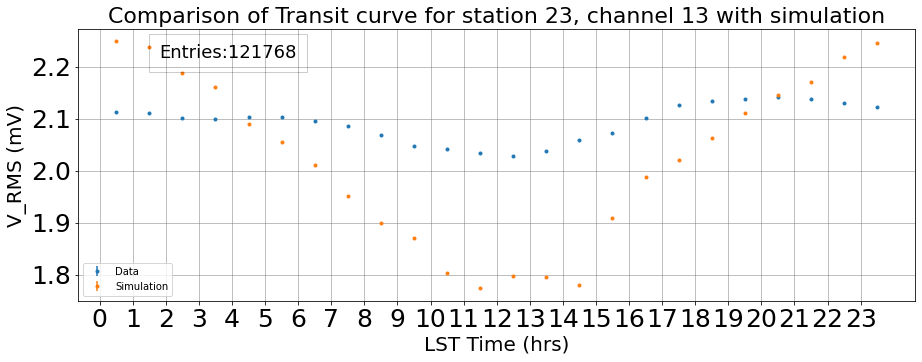

In [2]:
TransitCurveComparison(23,13,"1879406","V2",24)

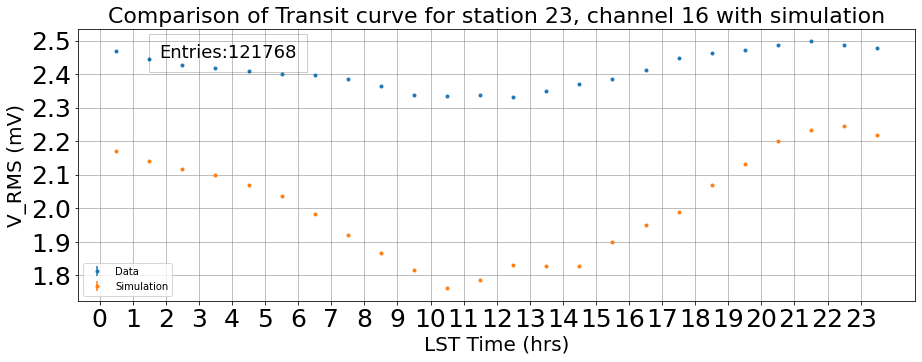

In [3]:
TransitCurveComparison(23,16,"1879423","V1",24)

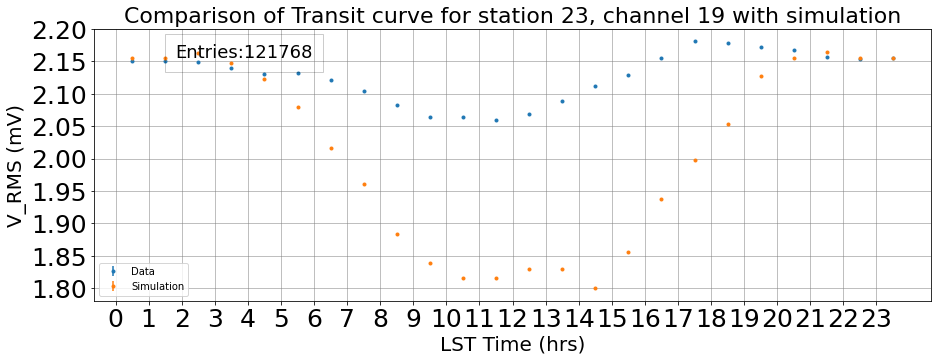

In [4]:
TransitCurveComparison(23,19,"1879424","V1",24)

## With thermal noise:

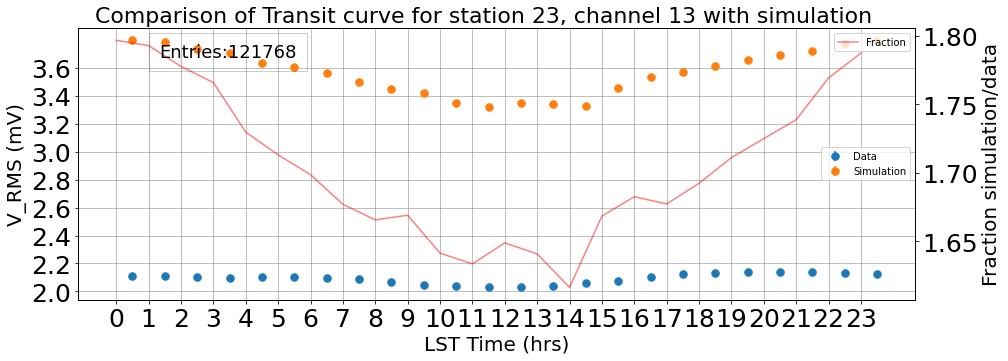

In [71]:
TransitCurveComparison(23,13,"1879406","V2",24)

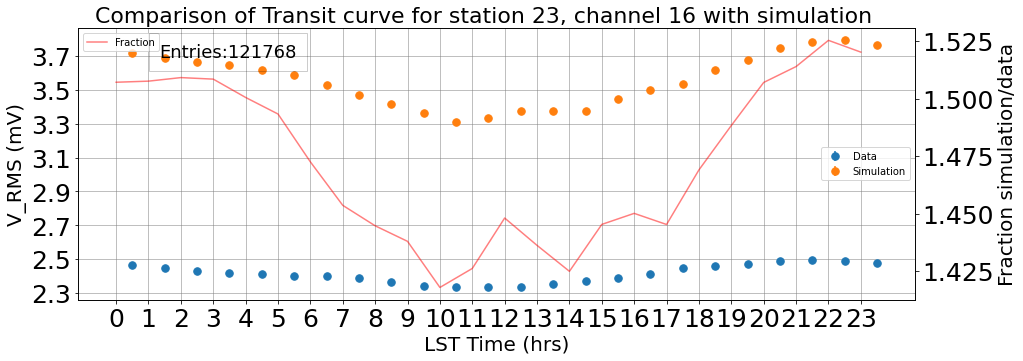

In [72]:
TransitCurveComparison(23,16,"1879423","V1",24)

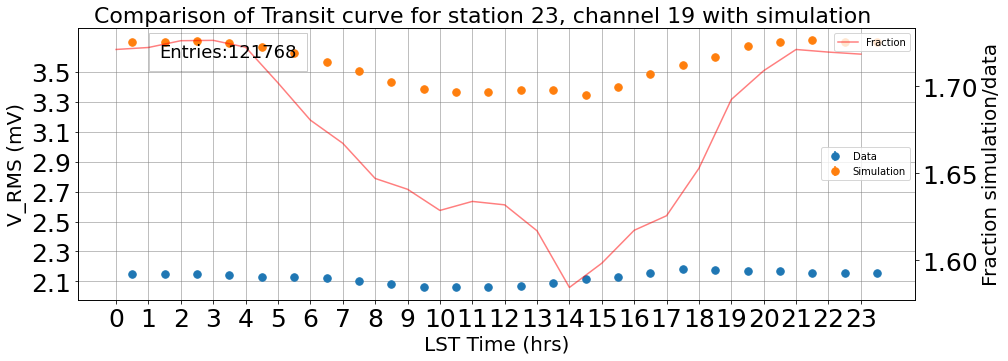

In [73]:
TransitCurveComparison(23,19,"1879424","V1",24)

In [3]:
def TransitCurvePlotJobs(FileId,StNr,ChNr,Sim=False, DataSample="C",NBins=24):
    #Plots the transit curves from JobsResults for a file with name "FileId, station StNr, channel ChNr, binned in NBins bins. For simulations Sim= True and for data Sim=False"
    #DataSample can be "C" for combined, "HC" for handcarry or "S" for Satellite     
        import numpy as np
        import matplotlib.pyplot as plt

        if Sim:
            EventRMS=np.load("JobResults/Sim/St" + str(StNr) + "Ch" + str(ChNr) + "/" + DataSample + "SimEventRMS_" + str(FileId) + ".npy",allow_pickle=True)
            EventTime=np.load("JobResults/Sim/St" + str(StNr) + "Ch" + str(ChNr) + "/" + DataSample + "SimEventTime_" + str(FileId) + ".npy",allow_pickle=True)
        else:
            EventRMS=np.load("JobResults/Data/St" + str(StNr) + "Ch" + str(ChNr) + "/" + DataSample + "EventRMS_" + str(FileId) + ".npy",allow_pickle=True)
            EventTime=np.load("JobResults/Data/St" + str(StNr) + "Ch" + str(ChNr) + "/" + DataSample + "EventTime_" + str(FileId) + ".npy",allow_pickle=True)


        EventTimeCounts, EventTimeBins=np.histogram(EventTime, bins=NBins,range=(0,24),density=False) #Storing timestamps in histogram format
        #Compute std per bin
        
        EventTimeDig=np.digitize(EventTime,EventTimeBins)
        GroupedVRMS=np.empty((NBins,),dtype=object)
        for i in range(len(EventTimeDig)):
            GroupedVRMS[EventTimeDig[i]-1]=np.append(GroupedVRMS[EventTimeDig[i]-1],EventRMS[i])
        ##Get rid of "None" entries in beginning of array
        for i in range(len(GroupedVRMS)):
            GroupedVRMS[i]=np.delete(GroupedVRMS[i], 0) 
        
        
        MidBins= np.array([(EventTimeBins[i] + EventTimeBins[i+1])/2 for i in range(0,len(EventTimeBins)-1)]) 
        VRMSAvg=np.array([np.mean(GroupedVRMS[i]) if len(GroupedVRMS[i])!=0 else 0 for i in range(len(GroupedVRMS))])
        VRMSStd=np.array([np.std(GroupedVRMS[i])/len(GroupedVRMS[i]) if len(GroupedVRMS[i])!=0 else 0 for i in range(len(GroupedVRMS))])

        plt.figure(figsize=(15,5))
        #plt.hist(RMSBins, bins=24,range=(0,24),density=False, weights=[EventRMS[i]/EventRMSCounts[i] for i in range(len(EventRMS))])
        if Sim:
            VRMSAvg+=1.5477116006013911 #Adding thermal noise
            plt.errorbar(MidBins,VRMSAvg,yerr=VRMSStd,fmt=".",zorder=2,markersize=10)
            plt.title("Simulation of Galactic noise for station " + str(StNr) + ", antenna " + str(ChNr),fontsize=25)
            plt.figtext(0.2, 0.8, "Simulations:" + str(len(EventRMS)), fontsize=18,bbox=dict(edgecolor='black', facecolor='none', alpha=0.2, pad=10.0))
        else:
            plt.errorbar(MidBins,1000*VRMSAvg,yerr=1000*VRMSStd,fmt=".",zorder=2,markersize=10)
            plt.title("Transit curve for station " + str(StNr) + ", antenna " + str(ChNr),fontsize=25)
            plt.figtext(0.2, 0.8, "Entries:" + str(len(EventRMS)), fontsize=18,bbox=dict(edgecolor='black', facecolor='none', alpha=0.2, pad=10.0))
        #for i in range(len(GroupedVRMS)):
        #    plt.plot(MidBins[i]*np.ones(len(GroupedVRMS[i])),1000*GroupedVRMS[i],"r.", alpha=0.5,zorder=1)

        #plt.plot(MidBins,1000*VRMSAvg,'r.')
        plt.grid(color='grey', linestyle='-', linewidth=1,alpha=0.5)
        
        #plt.ylim(-50,50)
        #plt.xlim(0,np.max(SamplingTimes*(10**9)))
        plt.xlabel("LST Time (hrs)",fontsize=20)#20)
        plt.ylabel("V_RMS (mV)",fontsize=20)#20)
        plt.xticks(np.arange(0, 24, 1.0),fontsize=25)#15)
        plt.yticks(fontsize=25)#15)
        #plt.legend()
        plt.show()

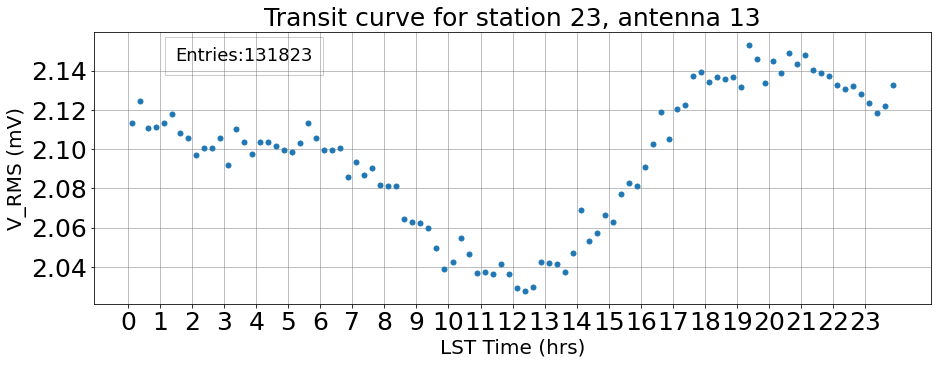

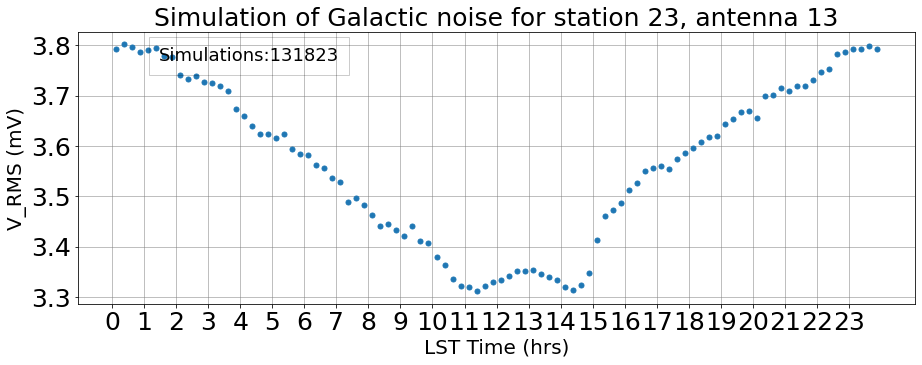

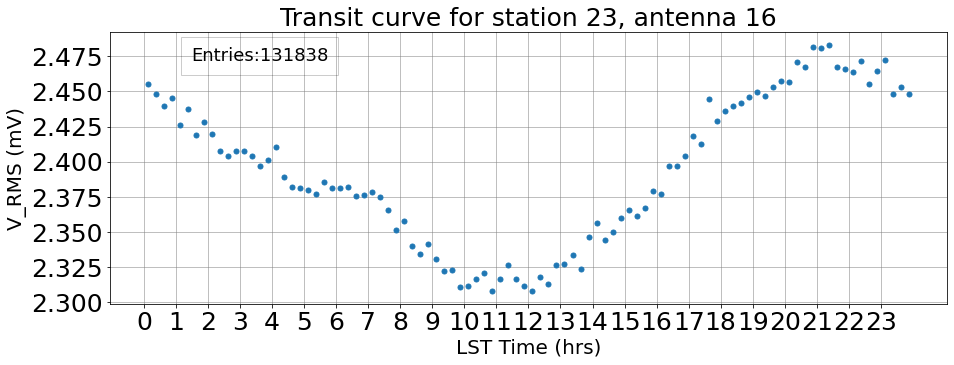

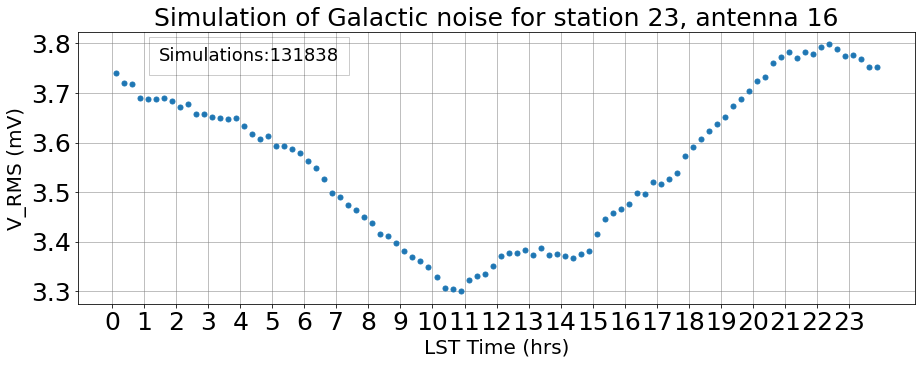

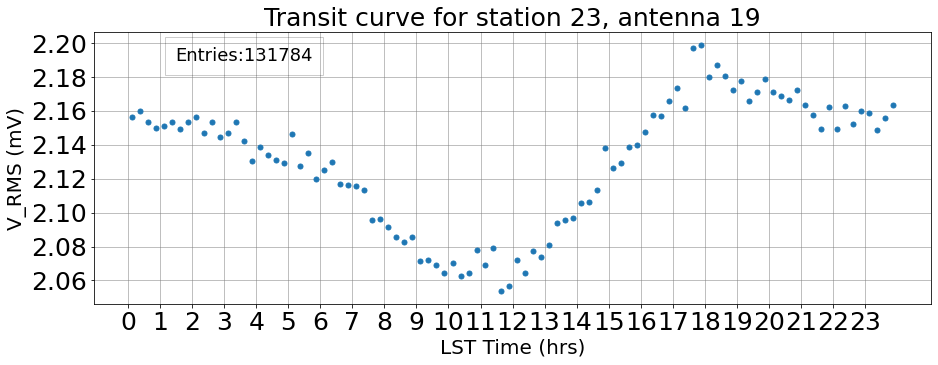

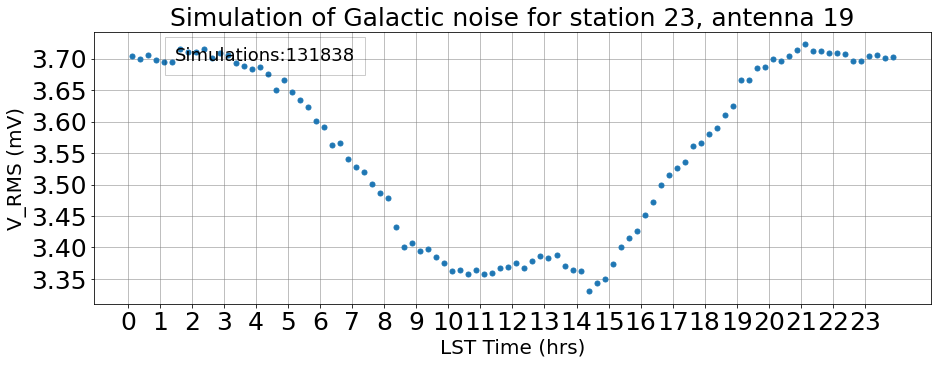

In [4]:
for ChNr in [13,16,19]:
    TransitCurvePlotJobs("Tot",23,ChNr,Sim=False, DataSample="C",NBins=4*24)
    TransitCurvePlotJobs("Tot",23,ChNr,Sim=True, DataSample="C",NBins=4*24)

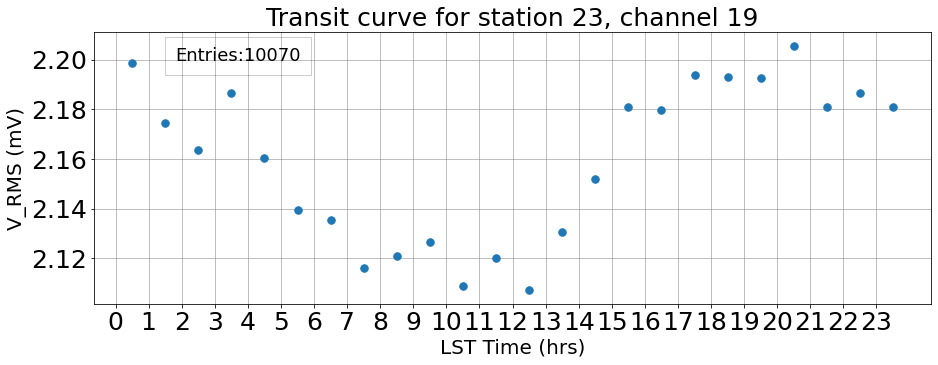

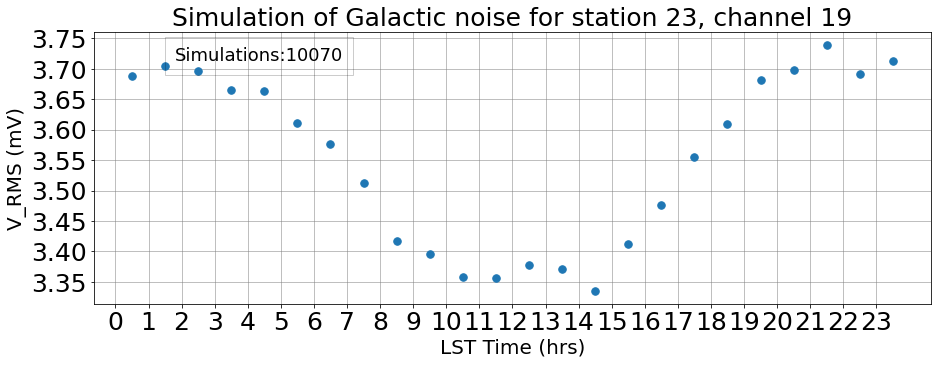

In [17]:
TransitCurvePlotJobs("1898171-0",23,19,Sim=False, DataSample="S",NBins=24)
TransitCurvePlotJobs("1945454-Tot",23,19,Sim=True, DataSample="S",NBins=24)

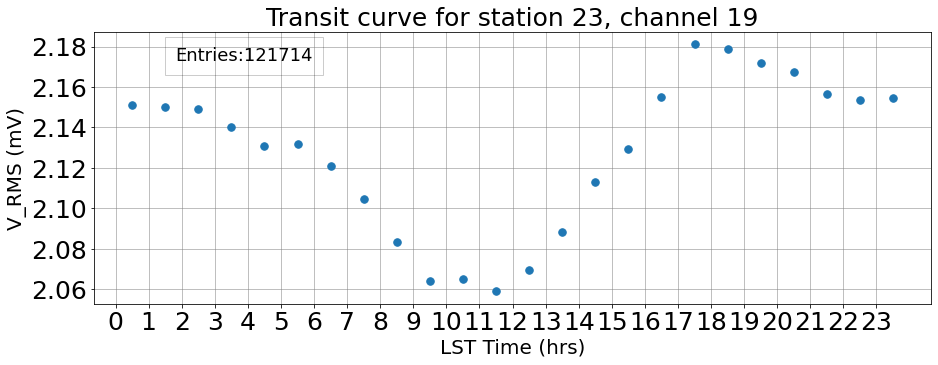

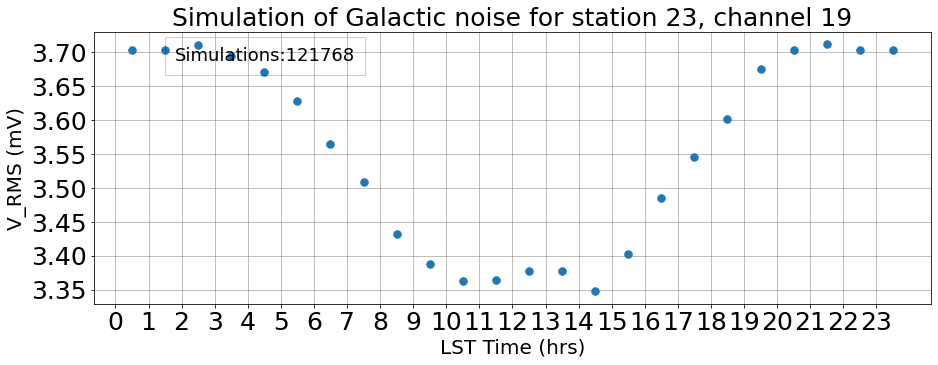

In [18]:
TransitCurvePlotJobs("1879424-Tot",23,19,Sim=False, DataSample="HC",NBins=24)
TransitCurvePlotJobs("V1-Tot",23,19,Sim=True, DataSample="HC",NBins=24)